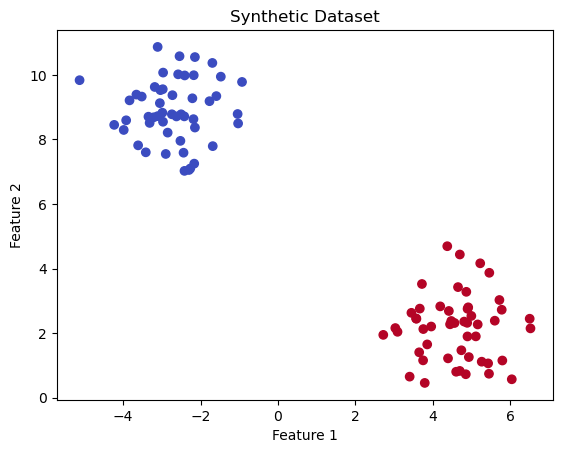

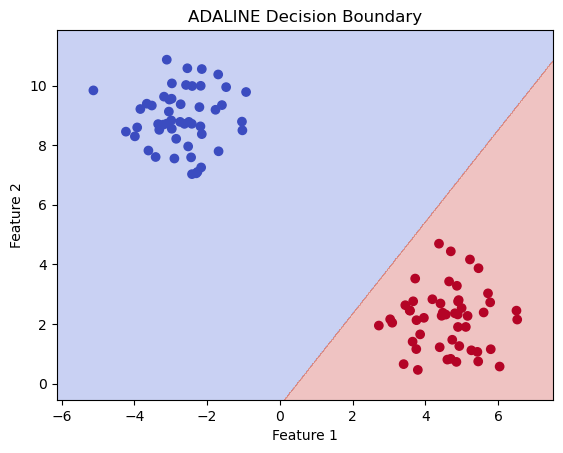

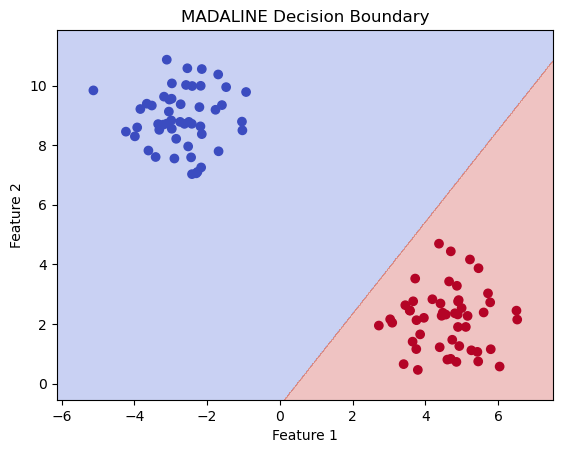

In [1]:
#Build ADALINE and MADALINE networks .
#Note: You can generate the synthetic dataset using make_blobs from sklearn.datasets.

from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.show()


# Adaline

class Adaline:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []
        
        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Madaline
class Madaline:
    def __init__(self, n_adalines, learning_rate=0.01, epochs=100):
        self.n_adalines = n_adalines
        self.adalines = [Adaline(learning_rate, epochs) for _ in range(n_adalines)]
    
    def fit(self, X, y):
        for adaline in self.adalines:
            adaline.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.array([adaline.predict(X) for adaline in self.adalines])
        return np.sign(np.sum(predictions, axis=0))



adaline = Adaline()
adaline.fit(X, y)

madaline = Madaline(n_adalines=3)
madaline.fit(X, y)


def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot decision boundary for ADALINE
plot_decision_boundary(adaline, X, y, title='ADALINE Decision Boundary')

# Plot decision boundary for MADALINE
plot_decision_boundary(madaline, X, y, title='MADALINE Decision Boundary')
